In [1]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#import gdal
import geopandas as gpd
from shapely.geometry import Point, Polygon, mapping
import rasterio
import rasterio.plot
import rasterio.mask # an important package which allows you to only extract points within your shapefile
import rasterstats # gives us raster summaries within a shapefile
from rasterstats import zonal_stats # gives us raster summaries within a shapefile



#import osmnx as ox # open streetmap package
os.getcwd()

'C:\\Users\\leogo\\OneDrive\\Desktop\\PhD\\Analysis\\data\\rhomis_data'

In [2]:
#os.chdir('../../')
os.getcwd()

'C:\\Users\\leogo\\OneDrive\\Desktop\\PhD\\Analysis'

In [8]:
world_grid=gpd.read_file(os.path.join('data', 'shapefiles', 'world_grid_100.0km'))
geometry=world_grid.values #contains country name, metadata and

In [43]:
variables_to_look_attach={"education":os.path.join("ClimAfr21_education index","ClimAfr21_education_index.tif"),
                         "technological_capital":os.path.join("ClimAfr08_technological capital index","ClimAfr08_technological capital index.tif")}
variables_to_look_attach

{'education': 'ClimAfr21_education index\\ClimAfr21_education_index.tif',
 'technological_capital': 'ClimAfr08_technological capital index\\ClimAfr08_technological capital index.tif'}

In [11]:
#https://gis.stackexchange.com/questions/297076/how-to-calculate-mean-value-of-a-raster-for-each-polygon-in-a-shapefile

filepath=os.path.join("data", "raster", "ClimAfr21_education_index", "ClimAfr21_education index.tif")
#print the metadata of the tif (rastwer) file
with rasterio.open(filepath) as src:
    # can check the profile and type of src, but effectively is an open file command
    affine = src.transform # transforms the raster dataset into the coordinate reference syste
    raster_array=rasterio.open(filepath).read(1) # why is this "1" here?
    raster_statistics_for_grid = pd.DataFrame(zonal_stats(world_grid, raster_array, affine=affine,nodata=None)) # calculates raster statistics within boundary of shapefile
    
raster_statistics_for_grid=pd.concat([world_grid,raster_statistics_for_grid],axis=1)

In [38]:
grid_raster_merge=raster_statistics_for_grid

In [39]:
#grid_raster_merge.columns=
#mapped_value="education"
#grid_raster_merge=grid_raster_merge.replace({-9999.0:"NaN"})
#grid_raster_merge=grid_raster_merge.rename({"min":"min_"+mapped_value})
#grid_raster_merge=grid_raster_merge.rename({"max":"max_"+mapped_value})
#grid_raster_merge=grid_raster_merge.rename({"mean":"mean_"+mapped_value})
#grid_raster_merge=grid_raster_merge.rename({"count":"count_"+mapped_value})

#grid_raster_merge.head()
grid_raster_merge

,FID,geometry,min,max,mean,count
0,0,"POLYGON ((0.00000 0.00000, -0.89932 0.00000, -...",NaN,NaN,NaN,11664
1,1,"POLYGON ((0.00000 0.00000, 0.00000 0.89932, 0....",NaN,NaN,NaN,11664
2,2,"POLYGON ((0.00000 0.00000, 0.00000 -0.89932, -...",NaN,NaN,NaN,11664
3,3,"POLYGON ((0.00000 0.00000, 0.89932 0.00000, 0....",NaN,NaN,NaN,11664
4,4,"POLYGON ((-0.89932 0.00000, -1.79864 0.00000, ...",NaN,NaN,NaN,11664
...,...,...,...,...,...,...
51239,51239,"POLYGON ((170.73853 -82.73759, 177.85264 -82.7...",NaN,NaN,NaN,0
51240,51240,"POLYGON ((-177.85264 82.73759, -180.00000 82.7...",NaN,NaN,NaN,0
51241,51241,"POLYGON ((177.85264 82.73759, 177.85264 83.623...",NaN,NaN,NaN,0
51242,51242,"POLYGON ((-177.85264 -82.73759, -177.85264 -83...",NaN,NaN,NaN,0


In [40]:
def is_float(x):
    try: 
        return(float(x))
    except:
        return np.nan
def replace_negatives_with_na(x): 
    if x<0:
        x=np.nan
    return x;
def find_all_na_in_raster(dataframe, columns):
    dataframe.loc[:,columns]=dataframe.loc[:,columns].applymap(is_float)
    #dataframe.loc[:,columns]=dataframe.loc[:,columns].applymap(replace_negatives_with_na)
    return dataframe;

grid_raster_merge=find_all_na_in_raster(dataframe=grid_raster_merge, columns=["min", "max", "mean"])

In [41]:
grid_raster_merge=grid_raster_merge.drop(["min","max","count"],axis=1)
data_type="education"
grid_raster_merge.columns=[column_name.replace("mean","mean_"+data_type) for column_name in grid_raster_merge.columns]

,FID,geometry,min,max,mean_education,count
0,0,"POLYGON ((0.00000 0.00000, -0.89932 0.00000, -...",NaN,NaN,NaN,11664
1,1,"POLYGON ((0.00000 0.00000, 0.00000 0.89932, 0....",NaN,NaN,NaN,11664
2,2,"POLYGON ((0.00000 0.00000, 0.00000 -0.89932, -...",NaN,NaN,NaN,11664
3,3,"POLYGON ((0.00000 0.00000, 0.89932 0.00000, 0....",NaN,NaN,NaN,11664
4,4,"POLYGON ((-0.89932 0.00000, -1.79864 0.00000, ...",NaN,NaN,NaN,11664
...,...,...,...,...,...,...
51239,51239,"POLYGON ((170.73853 -82.73759, 177.85264 -82.7...",NaN,NaN,NaN,0
51240,51240,"POLYGON ((-177.85264 82.73759, -180.00000 82.7...",NaN,NaN,NaN,0
51241,51241,"POLYGON ((177.85264 82.73759, 177.85264 83.623...",NaN,NaN,NaN,0
51242,51242,"POLYGON ((-177.85264 -82.73759, -177.85264 -83...",NaN,NaN,NaN,0


In [21]:

#subsetting_non_na_values=grid_raster_merge.loc[:,"mean"]!="NaN"

subsetting_non_na_values=grid_raster_merge.loc[:,"mean"].notna()
subsetting_non_na_values

grid_raster_merge=grid_raster_merge.loc[subsetting_non_na_values,:]


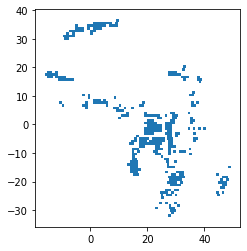

In [22]:
grid_raster_merge.plot()